# notes to me

- hyperparammeter tuning: https://www.youtube.com/watch?v=6Nf1x7qThR8&ab_channel=GregHogg
- was overfitting before, now its just bad

importing all the nceccessary libraries

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import plotly as pt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers.core import Dropout
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from imblearn.over_sampling import SMOTE
from scipy import ndimage
import os
import random
import numpy.ma as ma

In [37]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [38]:
olab_data=pd.read_csv("//Users/charan/Documents/datasets/stanford_aimi.blob/LABS.csv")
answer_data=pd.read_csv("/Users/charan/Documents/datasets/stanford_aimi.blob/Labels.csv")

In [39]:
olab_data.head()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,bun_cre:Binary,calcium:Binary,creatinine:Binary,...,hgb:Value,inr:Value,lactate:Value,platelet:Value,potassium:Value,ptt:Value,sodium:Value,wbc:Value,idx,split
0,0,1,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.3,84,test
1,1,1,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,655.0,0.0,0.0,0.0,13.8,2248,test
2,2,1,1,1,1,1,1,0,0,1,...,0.0,1.3,0.0,356.0,0.0,15.9,0.0,6.8,2271,test
3,3,1,1,1,1,1,1,0,0,1,...,0.0,0.0,1.8,426.0,0.0,0.0,0.0,10.0,1691,test
4,4,1,1,1,1,1,1,0,0,1,...,0.0,2.0,0.0,131.0,0.0,21.7,0.0,4.0,3286,test


In [40]:
olab_data.shape

(1892, 47)

In [41]:
olab_data.describe()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,bun_cre:Binary,calcium:Binary,creatinine:Binary,...,a1c:Value,hgb:Value,inr:Value,lactate:Value,platelet:Value,potassium:Value,ptt:Value,sodium:Value,wbc:Value,idx
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,...,1892.000000,1892.000000,1892.000000,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,1306.185518,0.750000,0.748943,0.749471,0.917019,0.746829,0.921776,0.114165,0.010042,0.941860,...,0.588953,0.015856,1.060772,3.171247e+12,241.947674,0.033140,11.979387,77.315011,67.523732,1581.755285
std,770.435727,0.433127,0.433736,0.433432,0.275926,0.434943,0.268595,0.318096,0.099733,0.234069,...,1.925077,0.400861,1.832387,1.379402e+14,142.132292,0.348929,13.168487,3175.786168,898.268722,1024.379050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,536.750000,0.750000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,161.000000,0.000000,0.000000,0.000000,5.900000,726.750000
50%,1466.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.100000,0.000000e+00,231.000000,0.000000,13.400000,0.000000,8.500000,1480.500000
75%,1972.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.200000,0.000000e+00,307.000000,0.000000,15.100000,0.000000,11.600000,2274.750000
max,2491.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.500000,11.700000,60.000000,6.000000e+15,1038.000000,4.200000,300.000000,138138.000000,24100.000000,3957.000000


plotting all the columns

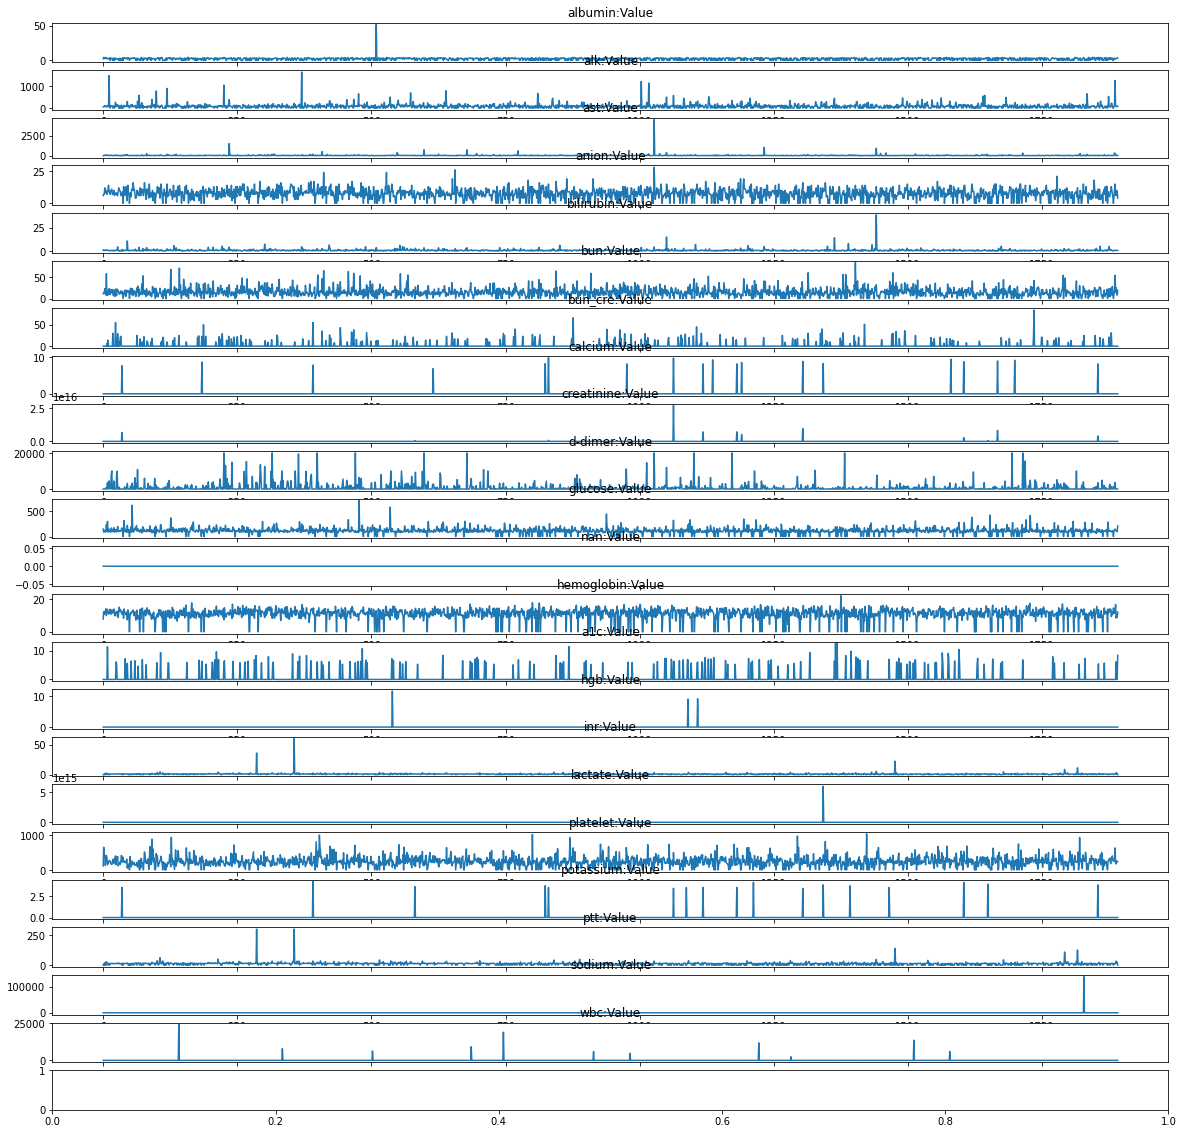

In [42]:
fig, axs = plt.subplots(23,1,figsize=(20,20));
for i in range(23,45):
    axs[i-23].plot(olab_data.iloc[:,i])
    #print(lab_data.columns[i])
    #axs[i-23].title(lab_data.columns[i])
    axs[i-23].title.set_text(olab_data.columns[i])

displaying and getting rid of all the columns with very few non-zero values

In [43]:
zcount=np.zeros(24)
for i in range(1,23):
    for j in range(1892):
        if(olab_data.iloc[j,i]==1):
            zcount[i]+=1
    if(zcount[i]<1000):
        print(olab_data.columns[i],zcount[i])


bun_cre:Binary 216.0
calcium:Binary 19.0
d-dimer:Binary 580.0
nan:Binary 0.0
a1c:Binary 169.0
hgb:Binary 3.0
lactate:Binary 450.0
potassium:Binary 17.0
sodium:Binary 61.0


In [44]:
lab_data=olab_data.copy(deep=True)

lab_data.pop("bun_cre:Binary")
lab_data.pop("bun_cre:Value")

lab_data.pop("calcium:Binary")
lab_data.pop("calcium:Value")

lab_data.pop("nan:Binary")
lab_data.pop("nan:Value")

lab_data.pop("a1c:Binary")
lab_data.pop("a1c:Value")

lab_data.pop("hgb:Binary")
lab_data.pop("hgb:Value")

lab_data.pop("lactate:Binary")
lab_data.pop("lactate:Value")

lab_data.pop("potassium:Binary")
lab_data.pop("potassium:Value")

lab_data.pop("sodium:Binary")
lab_data.pop("sodium:Value")
print("done")


done


In [45]:
lab_data.shape

(1892, 31)

In [46]:
lab_data.iloc[:,15:31]

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,2.6,51.0,15.0,6.0,0.8,12.0,1.00,0.0,148.0,7.9,0.0,116.0,0.0,0.3,84,test
1,4.4,60.0,24.0,7.0,1.3,11.0,0.93,0.0,88.0,12.4,0.0,655.0,0.0,13.8,2248,test
2,2.6,75.0,22.0,7.0,0.5,14.0,1.20,0.0,123.0,10.9,1.3,356.0,15.9,6.8,2271,test
3,3.0,117.0,71.0,12.0,0.6,23.0,1.30,0.0,126.0,11.7,0.0,426.0,0.0,10.0,1691,test
4,3.2,64.0,28.0,8.0,0.5,12.0,0.70,0.0,91.0,12.7,2.0,131.0,21.7,4.0,3286,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,2.0,86.0,67.0,7.0,0.6,15.0,0.92,0.0,121.0,16.8,1.2,193.0,13.8,5.8,1832,val
1888,2.2,68.0,11.0,6.0,0.5,25.0,1.20,0.0,124.0,8.5,3.3,172.0,33.3,6.4,2487,val
1889,3.1,74.0,76.0,10.0,0.6,13.0,0.80,0.0,110.0,9.5,1.1,256.0,14.5,15.0,1000,val
1890,3.7,96.0,34.0,9.0,0.5,8.0,0.80,0.0,96.0,9.0,2.3,248.0,24.5,5.6,2003,val


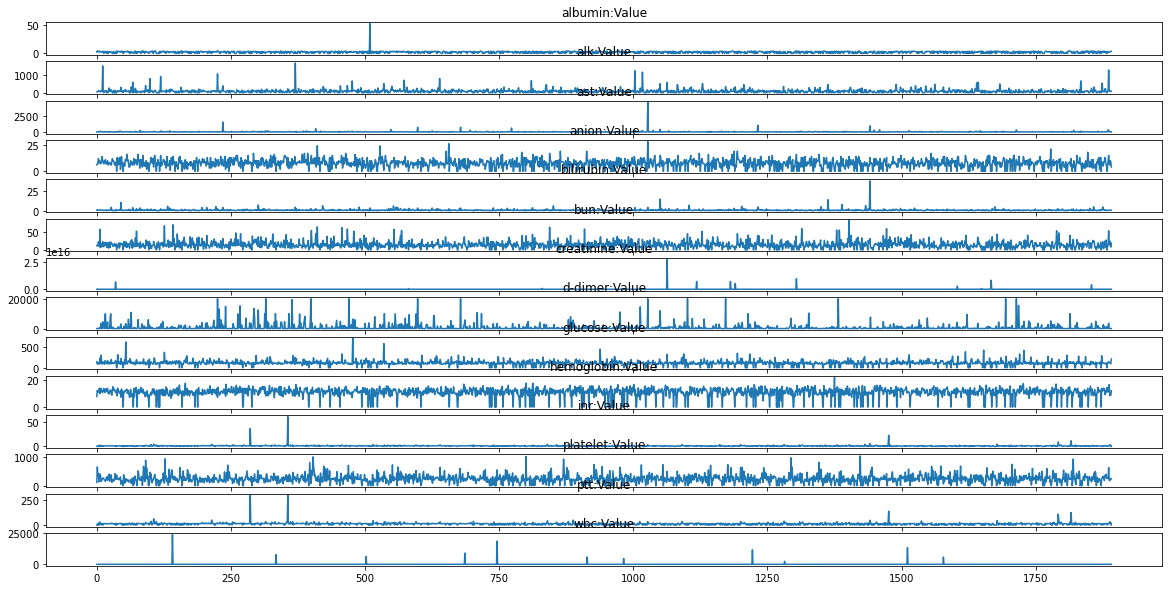

In [47]:
fig, axs = plt.subplots(14,1,figsize=(20,10))
for i in range(15,29):
    axs[i-15].plot(lab_data.iloc[:,i])
    #print(lab_data.columns[i])
    #axs[i-23].title(lab_data.columns[i])
    axs[i-15].title.set_text(lab_data.columns[i])

In [48]:
lab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.00000,1892.000000,1892.000000,1892.000000,1892.000000,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.276163,87.60518,35.647992,7.536469,0.692548,14.719345,4.260042e+13,818.299683,116.049683,10.935518,1.060772,241.947674,11.979387,67.523732,1581.755285
std,1.844037,111.33905,123.317460,3.832870,1.282998,9.928192,7.565985e+14,2387.966865,57.829923,3.557856,1.832387,142.132292,13.168487,898.268722,1024.379050
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.00000,0.000000,5.000000,0.000000,9.000000,7.000000e-01,0.000000,93.000000,9.800000,0.000000,161.000000,0.000000,5.900000,726.750000
50%,2.700000,75.00000,23.000000,8.000000,0.500000,13.000000,9.000000e-01,0.000000,110.000000,11.500000,1.100000,231.000000,13.400000,8.500000,1480.500000
75%,3.400000,109.00000,39.000000,10.000000,0.800000,19.000000,1.100000e+00,587.000000,137.000000,13.100000,1.200000,307.000000,15.100000,11.600000,2274.750000
max,51.900000,1647.00000,4548.000000,28.000000,38.700000,84.000000,2.700000e+16,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [49]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(lab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=lab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()


list of columns which need outlier management
- albumin(10)
- alk(10)
- ast(100)
- bilirubin(10)
- creatine(10^16)
- d-dimer(10)
- inr(10)
- wbc(1000)

good 
- bun
- anion
- platelet
- glucose
- hemoglobin
- ptt

In [50]:
def remove_outliers(name,thresh):
    for i in range(1892):
        #print(lab_data.loc[i,name]
        temp=lab_data[name].describe()[6]
        if(lab_data.loc[i,name]>thresh):
            lab_data.loc[i,name]=temp*2.5


In [51]:
#remove_outliers("albumin:Value",20,10)
#remove_outliers("alk:Value",200,10)
#remove_outliers("ast:Value",70,100)
#remove_outliers("bilirubin:Value",10,100)
#remove_outliers("bilirubin:Value",4,10)
remove_outliers("creatinine:Value",100)
#remove_outliers("creatinine:Value",11.2,10)
#remove_outliers("d-dimer:Value",10000,10)
#remove_outliers("inr:Value",12,10)
#remove_outliers("wbc:Value",105,1000)
#remove_outliers("wbc:Value",25,10)

In [52]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(lab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=lab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()

In [53]:
lab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.00000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.276163,87.60518,35.647992,7.536469,0.692548,14.719345,1.955359,818.299683,116.049683,10.935518,1.060772,241.947674,11.979387,67.523732,1581.755285
std,1.844037,111.33905,123.317460,3.832870,1.282998,9.928192,8.834873,2387.966865,57.829923,3.557856,1.832387,142.132292,13.168487,898.268722,1024.379050
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.00000,0.000000,5.000000,0.000000,9.000000,0.700000,0.000000,93.000000,9.800000,0.000000,161.000000,0.000000,5.900000,726.750000
50%,2.700000,75.00000,23.000000,8.000000,0.500000,13.000000,0.900000,0.000000,110.000000,11.500000,1.100000,231.000000,13.400000,8.500000,1480.500000
75%,3.400000,109.00000,39.000000,10.000000,0.800000,19.000000,1.100000,587.000000,137.000000,13.100000,1.200000,307.000000,15.100000,11.600000,2274.750000
max,51.900000,1647.00000,4548.000000,28.000000,38.700000,84.000000,97.000000,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [54]:
lab_data.shape

(1892, 31)

GETTING THE AVERAGE AND REPLACING THE ZER0S WITH THE AVERAGE

In [55]:
modlab_data=d = lab_data.copy(deep=True)
arr_avg=np.zeros(15)
for i in range(15,30):
    avg=0
    counter=0
    for j in range(lab_data.shape[0]-1):
        if(lab_data.iloc[j,i-15]==0):
            continue
        counter+=1
        avg+=lab_data.iloc[j,i]
        
    avg/=counter
    arr_avg[i-15]=avg
    
    for j in range(lab_data.shape[0]-1):
        if(lab_data.iloc[j,i]!=0):
            continue
        modlab_data.iloc[j,i]=avg
    
    #print(avg)
print(arr_avg)

[2.27523810e+00 1.16723554e+02 4.74851695e+01 8.11220889e+00
 7.52595156e-01 1.61898017e+01 2.00717728e+00 8.66859068e+02
 1.16191379e+02 1.15467927e+01 1.12962040e+00 2.59179632e+02
 1.27664018e+01 8.84921764e+01 1.57772279e+03]


In [56]:
modlab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.844972,116.909455,47.544382,8.226779,0.883083,15.985777,2.072056,1418.961542,124.954413,11.704490,1.345565,259.619013,15.251958,73.463745,1582.589177
std,1.334483,99.107868,121.582007,3.067005,1.220321,8.954139,8.821513,2208.801064,47.247102,2.030627,1.730275,126.158708,11.227041,898.095045,1023.732714
min,1.000000,15.000000,7.000000,1.000000,0.100000,1.000000,0.200000,0.000000,1.000000,4.600000,0.000000,2.000000,0.000000,0.100000,1.000000
25%,2.275238,75.750000,23.000000,6.000000,0.500000,10.000000,0.730000,866.859068,98.000000,10.300000,1.100000,185.000000,12.766402,6.600000,727.750000
50%,2.700000,109.500000,39.000000,8.000000,0.752595,15.000000,0.900000,866.859068,116.000000,11.546793,1.129620,247.000000,13.400000,9.300000,1483.000000
75%,3.400000,116.723554,47.485169,10.000000,0.800000,19.000000,1.200000,866.859068,137.000000,13.100000,1.200000,307.000000,15.100000,12.900000,2274.750000
max,51.900000,1647.000000,4548.000000,28.000000,38.700000,84.000000,97.000000,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [57]:
modlab_data.head()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,creatinine:Binary,d-dimer:Binary,glucose:Binary,...,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,0,1,1,1,1,1,1,1,0,1,...,1.00,866.859068,148.0,7.9,1.12962,116.0,12.766402,0.3,84.0,test
1,1,1,1,1,1,1,1,1,0,1,...,0.93,866.859068,88.0,12.4,1.12962,655.0,12.766402,13.8,2248.0,test
2,2,1,1,1,1,1,1,1,0,1,...,1.20,866.859068,123.0,10.9,1.30000,356.0,15.900000,6.8,2271.0,test
3,3,1,1,1,1,1,1,1,0,1,...,1.30,866.859068,126.0,11.7,1.12962,426.0,12.766402,10.0,1691.0,test
4,4,1,1,1,1,1,1,1,0,1,...,0.70,866.859068,91.0,12.7,2.00000,131.0,21.700000,4.0,3286.0,test


In [58]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(modlab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=modlab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()

In [59]:
modlab_data=modlab_data.iloc[:,15:]

In [60]:
modlab_data.head()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,2.6,51.0,15.0,6.0,0.8,12.0,1.00,866.859068,148.0,7.9,1.12962,116.0,12.766402,0.3,84.0,test
1,4.4,60.0,24.0,7.0,1.3,11.0,0.93,866.859068,88.0,12.4,1.12962,655.0,12.766402,13.8,2248.0,test
2,2.6,75.0,22.0,7.0,0.5,14.0,1.20,866.859068,123.0,10.9,1.30000,356.0,15.900000,6.8,2271.0,test
3,3.0,117.0,71.0,12.0,0.6,23.0,1.30,866.859068,126.0,11.7,1.12962,426.0,12.766402,10.0,1691.0,test
4,3.2,64.0,28.0,8.0,0.5,12.0,0.70,866.859068,91.0,12.7,2.00000,131.0,21.700000,4.0,3286.0,test


In [61]:
modlab_data=modlab_data.sort_values(by=["idx"])
modlab_data.reset_index(drop=True)

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,3.900000,48.000000,37.000000,9.000000,1.500000,17.000000,0.800000,866.859068,108.000000,10.700000,1.30000,224.000000,15.700000,6.200000,1.0,test
1,3.900000,48.000000,54.000000,2.000000,1.500000,18.000000,1.000000,866.859068,241.000000,9.700000,1.30000,91.000000,15.600000,10.200000,2.0,train
2,2.275238,116.723554,47.485169,9.000000,0.752595,14.000000,1.190000,866.859068,138.000000,11.546793,1.12962,259.179632,12.766402,88.492176,3.0,train
3,2.275238,116.723554,47.485169,8.112209,0.752595,16.189802,2.007177,866.859068,116.191379,11.546793,1.12962,259.179632,12.766402,88.492176,4.0,train
4,1.900000,451.000000,43.000000,7.000000,14.200000,9.000000,0.700000,866.859068,108.000000,10.300000,1.30000,178.000000,15.400000,7.100000,6.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,3.200000,74.000000,22.000000,8.000000,1.100000,26.000000,1.200000,866.859068,88.000000,12.500000,1.10000,334.000000,13.300000,13.100000,3939.0,train
1888,3.500000,74.000000,28.000000,8.000000,0.500000,21.000000,0.900000,866.859068,123.000000,13.300000,1.10000,199.000000,13.600000,6.400000,3940.0,train
1889,3.600000,72.000000,76.000000,8.000000,0.500000,22.000000,1.100000,492.000000,152.000000,13.300000,1.12962,197.000000,12.766402,6.300000,3943.0,train
1890,1.500000,138.000000,17.000000,5.000000,0.500000,10.000000,1.300000,866.859068,116.000000,8.600000,1.50000,69.000000,17.700000,6.400000,3951.0,train


In [62]:
answer_data=answer_data.sort_values(by=["idx"])
answer_data.reset_index(drop=True)

,Unnamed: 0,idx,label,pe_type,split
0,1521,0,0,NaN,test
1,963,1,1,central,test
2,878,2,0,NaN,train
3,302,3,1,segmental,train
4,122,4,0,NaN,train
...,...,...,...,...,...
1832,1690,3939,0,NaN,train
1833,1266,3940,0,NaN,train
1834,677,3943,0,NaN,train
1835,1761,3951,0,NaN,train


OBTAINING THE TRAIN,VALIDATE,OR TEST DATA

In [63]:
def split(section):
    height=0
    width=23
    #fin=pd.DataFrame()
    finx=modlab_data.copy(deep=True)
    finy=answer_data.copy(deep=True)
    labpoint=0
    anspoint=0
    while(labpoint<finx.shape[0] and anspoint<finy.shape[0]):
        while(modlab_data['idx'].iloc[labpoint]>answer_data['idx'].iloc[anspoint] and anspoint<finy.shape[0]-1):
            anspoint+=1
        while(modlab_data['idx'].iloc[labpoint]<answer_data['idx'].iloc[anspoint] and labpoint<finx.shape[0]-1):
            labpoint+=1
        if(modlab_data['idx'].iloc[labpoint]==answer_data['idx'].iloc[anspoint]):
            #fin.append(modlab_data.iloc[labpoint])
            #fin=pd.concat([fin,modlab_data.iloc[labpoint]])
            finx.iloc[height] = modlab_data.iloc[labpoint]
            finy.iloc[height] = answer_data.iloc[anspoint]
            height+=1
            #print(modlab_data.iloc[labpoint])
            #print(answer_data.iloc[anspoint])
            anspoint+=1
            labpoint+=1
    finx=finx[0:height]
    finy=finy[0:height]
    
    finx=finx[finx["split"].str.contains(section)]
    finy=finy[finy["split"].str.contains(section)]
    
    finx=finx.sort_values(by=["idx"])
    finx=finx.reset_index(drop=True)
    
    finy=finy.sort_values(by=["idx"])
    finy=finy.reset_index(drop=True)
    return finx.loc[:,:"wbc:Value"], finy.loc[:,"label":"label"]

In [64]:
x_train, y_train=split("")
y_train

,label
0,1
1,0
2,1
3,0
4,0
...,...
1831,0
1832,0
1833,0
1834,0


In [65]:
x_train

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value
0,3.900000,48.000000,37.000000,9.000000,1.500000,17.000000,0.800000,866.859068,108.000000,10.700000,1.30000,224.000000,15.700000,6.200000
1,3.900000,48.000000,54.000000,2.000000,1.500000,18.000000,1.000000,866.859068,241.000000,9.700000,1.30000,91.000000,15.600000,10.200000
2,2.275238,116.723554,47.485169,9.000000,0.752595,14.000000,1.190000,866.859068,138.000000,11.546793,1.12962,259.179632,12.766402,88.492176
3,2.275238,116.723554,47.485169,8.112209,0.752595,16.189802,2.007177,866.859068,116.191379,11.546793,1.12962,259.179632,12.766402,88.492176
4,1.900000,451.000000,43.000000,7.000000,14.200000,9.000000,0.700000,866.859068,108.000000,10.300000,1.30000,178.000000,15.400000,7.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,3.200000,74.000000,22.000000,8.000000,1.100000,26.000000,1.200000,866.859068,88.000000,12.500000,1.10000,334.000000,13.300000,13.100000
1832,3.500000,74.000000,28.000000,8.000000,0.500000,21.000000,0.900000,866.859068,123.000000,13.300000,1.10000,199.000000,13.600000,6.400000
1833,3.600000,72.000000,76.000000,8.000000,0.500000,22.000000,1.100000,492.000000,152.000000,13.300000,1.12962,197.000000,12.766402,6.300000
1834,1.500000,138.000000,17.000000,5.000000,0.500000,10.000000,1.300000,866.859068,116.000000,8.600000,1.50000,69.000000,17.700000,6.400000


SEEING HOW UNBALANCED IT IS

In [66]:
neg=0
for i in range(1454):
    if((y_train["label"].iloc[i]<0.5)):
        neg+=1
neg

862

In [67]:
count=0
block=np.zeros(438)
for i in range(1,1454):
    if(count>=438):
        break
    if(y_train["label"].iloc[i]==0):
        block[count]=i
        count+=1
        #y_train=y_train.drop([i])
        #x_train=x_train.drop([i]) 
#y_train=y_train.drop(block)
#x_train=x_train.drop(block) 

In [68]:
pos=0
for i in range(1454):
    if((y_train["label"].iloc[i]>0.5)):
        pos+=1
pos

592

In [69]:
y_train.reset_index(drop=True)

,label
0,1
1,0
2,1
3,0
4,0
...,...
1831,0
1832,0
1833,0
1834,0


In [70]:
x_train.reset_index(drop=True)

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value
0,3.900000,48.000000,37.000000,9.000000,1.500000,17.000000,0.800000,866.859068,108.000000,10.700000,1.30000,224.000000,15.700000,6.200000
1,3.900000,48.000000,54.000000,2.000000,1.500000,18.000000,1.000000,866.859068,241.000000,9.700000,1.30000,91.000000,15.600000,10.200000
2,2.275238,116.723554,47.485169,9.000000,0.752595,14.000000,1.190000,866.859068,138.000000,11.546793,1.12962,259.179632,12.766402,88.492176
3,2.275238,116.723554,47.485169,8.112209,0.752595,16.189802,2.007177,866.859068,116.191379,11.546793,1.12962,259.179632,12.766402,88.492176
4,1.900000,451.000000,43.000000,7.000000,14.200000,9.000000,0.700000,866.859068,108.000000,10.300000,1.30000,178.000000,15.400000,7.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,3.200000,74.000000,22.000000,8.000000,1.100000,26.000000,1.200000,866.859068,88.000000,12.500000,1.10000,334.000000,13.300000,13.100000
1832,3.500000,74.000000,28.000000,8.000000,0.500000,21.000000,0.900000,866.859068,123.000000,13.300000,1.10000,199.000000,13.600000,6.400000
1833,3.600000,72.000000,76.000000,8.000000,0.500000,22.000000,1.100000,492.000000,152.000000,13.300000,1.12962,197.000000,12.766402,6.300000
1834,1.500000,138.000000,17.000000,5.000000,0.500000,10.000000,1.300000,866.859068,116.000000,8.600000,1.50000,69.000000,17.700000,6.400000


Z-SCORE NORMALIZATION

In [71]:
def normalize(xval):
    avg=xval.describe()
    avg=avg.iloc[1,:]
    sigma=xval.std()
    for i in range(xval.shape[1]):
        #print(avg[i])
        #print(sigma[i])
        xval.iloc[:,i:i+1]-=avg[i]
        xval.iloc[:,i:i+1]/=sigma[i]
    return xval

In [72]:
x_train=normalize(x_train)

In [73]:
#def checkAlignment(xval,yval):
#    for i in range(xval.shape[0]):
#        if(xval.loc[i,"idx"]!=yval.loc[i,"idx"]):
#            return False
#   return True

VALIDATION DATA

In [74]:
val_x, val_y=split("val")
#val_x=val_x.loc[:,:"wbc:Value"]
val_y=val_y.loc[:,"label"]
#val_x=np.array(val_x)
val_x=val_x.astype('float32')
val_x=normalize(val_x)
#val_x

In [75]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [76]:
total=1892
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

AUTOMATIC HYPERPARAMETER TUNER

In [77]:
def modelb_builder(hp):
    model=Sequential()
    
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=20)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=20)
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=1000, step=20)
    hp_layer_4 = hp.Int('layer_4', min_value=1, max_value=1000, step=20)
    hp_layer_5 = hp.Int('layer_5', min_value=1, max_value=1000, step=20)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-5,1e-6,1e-7])
    #hp_kregval = hp.Float("kreg_val",min_value=0, max_value=0.3, step=0.0002)
    hp_kregval2 = hp.Float("kreg_val2",min_value=0, max_value=0.3, step=0.0002)
    #hp_kregval3 = hp.Float("kreg_val3",min_value=0, max_value=0.3, step=0.0002)
    hp_kregval4 = hp.Float("kreg_val4",min_value=0, max_value=0.3, step=0.0002)
    #hp_drop = hp.Float("drop_val",min_value=0,max_value=0.5,step=0.001)

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(hp_kregval2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(hp_kregval4)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    return model

In [78]:
tuner = kt.Hyperband(modelb_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x64')

INFO:tensorflow:Reloading Oracle from existing project dir/x64/oracle.json
INFO:tensorflow:Reloading Tuner from dir/x64/tuner0.json


In [79]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=4)

In [80]:
tuner.search(x_train, y_train, epochs=50, validation_data=(val_x,val_y), callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [81]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.get("kreg_val4")

0.0354

In [138]:
modelFNN=Sequential()
hp_activation="relu"
hp_layer_1 = 921
hp_layer_2 = 381
hp_layer_3 = 881
hp_layer_4 = 941
hp_layer_5 = 141

hp_learning_rate = 1e-5
hp_kregval2 = 0.6672
hp_kregval4 = 0.0854
dval=0.13

modelFNN.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0.1)))
modelFNN.add(tf.keras.layers.BatchNormalization())
Dropout(dval)
modelFNN.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(hp_kregval2)))
modelFNN.add(tf.keras.layers.BatchNormalization())
Dropout(dval)
modelFNN.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0.1)))
modelFNN.add(tf.keras.layers.BatchNormalization())
Dropout(dval)
modelFNN.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(hp_kregval4)))
modelFNN.add(tf.keras.layers.BatchNormalization())
Dropout(dval)
modelFNN.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L1(0.1)))
modelFNN.add(tf.keras.layers.BatchNormalization())
Dropout(dval)
modelFNN.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
modelFNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate/2.5),
    loss=tf.keras.losses.BinaryCrossentropy(),
     metrics=['accuracy'])

In [139]:
ACCURACY_THRESHOLD=0.75

In [140]:
beststop_early=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=8)

In [141]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

In [142]:
teststop=myCallback()

In [143]:
history = modelFNN.fit(x_train, y_train, epochs=250, validation_data=(val_x,val_y),callbacks=[teststop])

Epoch 1/250
70/70 [==============================] - 5s 42ms/step - loss: 11642.3926 - accuracy: 0.4982 - val_loss: 11591.9160 - val_accuracy: 0.5648
Epoch 2/250
70/70 [==============================] - 1s 20ms/step - loss: 11544.2520 - accuracy: 0.4887 - val_loss: 11493.9990 - val_accuracy: 0.5492
Epoch 3/250
70/70 [==============================] - 1s 21ms/step - loss: 11446.5010 - accuracy: 0.5054 - val_loss: 11396.5078 - val_accuracy: 0.5389
Epoch 4/250
70/70 [==============================] - 1s 20ms/step - loss: 11349.2031 - accuracy: 0.5135 - val_loss: 11299.4365 - val_accuracy: 0.5181
Epoch 5/250
70/70 [==============================] - 1s 20ms/step - loss: 11252.3242 - accuracy: 0.5104 - val_loss: 11202.7969 - val_accuracy: 0.5285
Epoch 6/250
70/70 [==============================] - 1s 19ms/step - loss: 11155.8555 - accuracy: 0.5153 - val_loss: 11106.5781 - val_accuracy: 0.5181
Epoch 7/250
70/70 [==============================] - 2s 22ms/step - loss: 11059.8115 - accuracy: 0.5

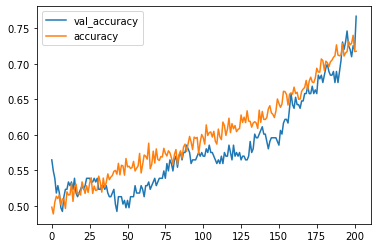

In [144]:

plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.plot(history.history["accuracy"],label="accuracy")
plt.legend()
plt.show()

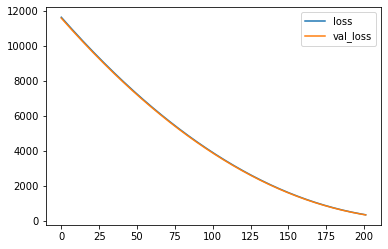

In [145]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [169]:
modelFNN.evaluate(val_x,val_y)

7/7 [==============================] - 0s 12ms/step - loss: 336.9161 - accuracy: 0.7668


[336.9161376953125, 0.7668393850326538]

In [172]:
finmodel=modelFNN
finmodel.evaluate(val_x,val_y)
#save best model
#finmodel.save("/Users/charan/Documents/Synopsys/finmodel")

7/7 [==============================] - 0s 7ms/step - loss: 336.9161 - accuracy: 0.7668


[336.9161376953125, 0.7668393850326538]

In [165]:

#load best model
#finmodel=tf.keras.models.load_model("/Users/charan/Documents/Synopsys/finmodel")

In [167]:
finmodel.evaluate(val_x,val_y)

7/7 [==============================] - 0s 12ms/step - loss: 336.9161 - accuracy: 0.7668


[336.9161376953125, 0.7668393850326538]

In [ ]:
ans=0
for i in range(193):
    if((a[i]<0.5)):
        ans+=1
ans

93

In [ ]:
ans=0
for i in range(193):
    if((val_y[i]<0.5)):
        ans+=1
ans

85

In [1112]:
y_train.shape

(1016, 1)

# CNN time

In [439]:
test=np.load("/Users/charan/Documents/datasets/stanford_aimi.blob/ct_scans/"+(str)(0)+".npy")
test.shape

(401, 512, 512)

[]

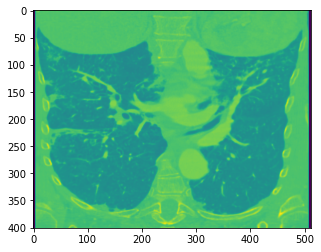

In [440]:
plt.imshow(test[:,300,:])
plt.plot()

[]

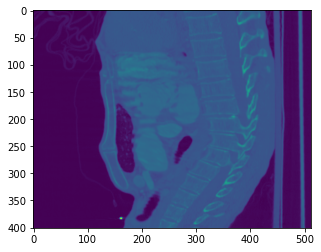

In [441]:
plt.imshow(test[:,:,255])
plt.plot()

[]

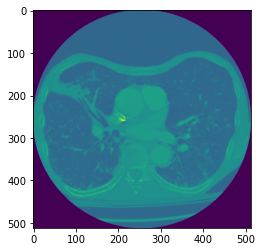

In [442]:
plt.imshow(test[191,:,:])
plt.plot()

In [443]:
def get_file(path):
    return np.load(path)


In [444]:

def normalize(volume):
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


In [445]:

def resize_volume(img):
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    cur_depth = img.shape[-1]
    cur_width = img.shape[0]
    cur_height = img.shape[1]
    depth = cur_depth / desired_depth
    width = cur_width / desired_width
    height = cur_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    img = ndimage.rotate(img, 90, reshape=False)
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img

In [446]:
def get_CT(ind):
    volume = get_file(ind)
    volume=normalize(volume)
    volume=resize_volume(volume)
    return volume

In [447]:
def locate_in_df(df, value):
    a = df.to_numpy()
    row = np.where(a == value)[0][0]
    col = np.where(a == value)[1][0]
    return row, col

In [448]:
locate_in_df(answer_data,0)

(0, 1)

In [449]:
temp =answer_data["idx"].to_numpy()
np.where(temp==0)[0][0]


0

In [512]:
pos_train=[]
pos_train_labels=[]
pos_val=[]
pos_val_labels=[]
pos_test=[]
pos_test_labels=[]

neg_train=[]
neg_train_labels=[]
neg_val=[]
neg_val_labels=[]
neg_test=[]
neg_test_labels=[]



for x in os.listdir("/Users/charan/Documents/datasets/stanford_aimi.blob/ct_scans/"):
    scan=os.path.join(os.getcwd(), "/Users/charan/Documents/datasets/stanford_aimi.blob/ct_scans/", x)
    ind=int(scan[61:len(scan[i])-5])
    temp =answer_data["idx"].to_numpy()
    loc=np.where(temp==ind)[0][0]
    #one if case for each category and sick/not-sick designation
    print(loc)
    if(answer_data["label"].iloc[loc]==1 and answer_data["split"].iloc[loc]=="train"):
        pos_train.append(get_CT(scan))
        pos_train_labels.append(1)
    elif(answer_data["label"].iloc[loc]==1 and answer_data["split"].iloc[loc]=="val"):
        pos_val.append(get_CT(scan))
        pos_val_labels.append(1)
    elif(answer_data["label"].iloc[loc]==1 and answer_data["split"].iloc[loc]=="test"):
        pos_test.append(get_CT(scan))
        pos_test_labels.append(1)
    elif(answer_data["label"].iloc[loc]==0 and answer_data["split"].iloc[loc]=="train"):
        neg_train.append(get_CT(scan))
        neg_train_labels.append(0)
    elif(answer_data["label"].iloc[loc]==0 and answer_data["split"].iloc[loc]=="val"):
        neg_val.append(get_CT(scan))
        neg_val_labels.append(0)
    elif(answer_data["label"].iloc[loc]==0 and answer_data["split"].iloc[loc]=="test"):
        neg_test.append(get_CT(scan))
        neg_test_labels.append(0)

1119
1621
1344
1622
3
622
0
1623
199
186


In [513]:
pos_val

[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [514]:
ct_x_train = np.concatenate((pos_train, neg_train), axis=0)
ct_y_train = np.concatenate((pos_train_labels, neg_train_labels), axis=0)

ct_x_val=np.concatenate((pos_val, neg_val), axis=0)
ct_y_val = np.concatenate((pos_val_labels, neg_val_labels), axis=0)

ct_x_test=np.concatenate((pos_test, neg_test), axis=0)
ct_y_test = np.concatenate((pos_test_labels, neg_test_labels), axis=0)

In [515]:

@tf.function
def rotate(volume):

    def scipy_rotate(volume):
        angles = [20, 10, 5, -5, -10, -20]
        angle = random.choice(angles)
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume

In [516]:

def train_preprocessing(volume, label):
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [517]:
train_loader = tf.data.Dataset.from_tensor_slices((ct_x_train, ct_y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((ct_x_val, ct_y_val))

In [518]:
validation_loader

<TensorSliceDataset element_spec=(TensorSpec(shape=(128, 128, 64), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [523]:

a=len(ct_x_train)
b=len(ct_x_val)

batch_size = 2
train_dataset = (
    train_loader.shuffle(a)
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
validation_dataset = (
    validation_loader.shuffle(b)
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

Dimension of the CT scan is: (128, 128, 64, 1)


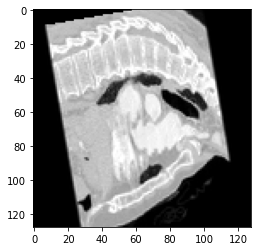

In [524]:
data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[0]
print("Dimension of the CT scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")

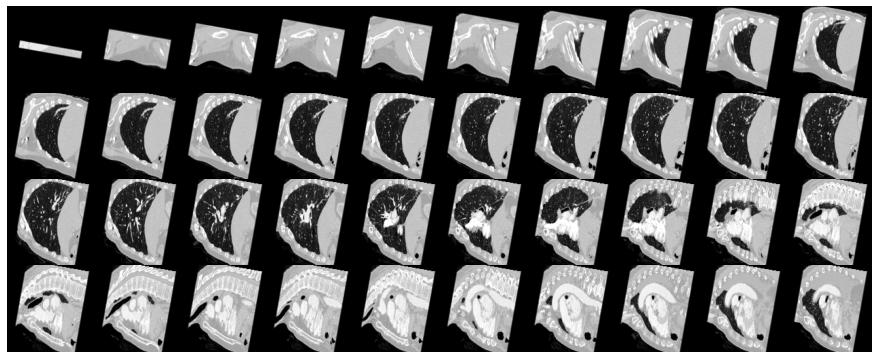

In [525]:
def plot_slices(num_rows, num_columns, width, height, data):
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


plot_slices(4, 10, 128, 128, image[:, :, :40])

In [526]:
def get_model(width=128, height=128, depth=64):

    inputs = keras.Input((width, height, depth, 1))

    x = tf.keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.GlobalAveragePooling3D()(x)
    x = tf.keras.layers.Dense(units=512, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    outputs = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 64, 1)  0         
                             ]                                   
                                                                 
 conv3d_8 (Conv3D)           (None, 126, 126, 62, 64)  1792      
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 63, 63, 31, 64)   0         
 3D)                                                             
                                                                 
 batch_normalization_74 (Bat  (None, 63, 63, 31, 64)   256       
 chNormalization)                                                
                                                                 
 conv3d_9 (Conv3D)           (None, 61, 61, 29, 64)    110656    
                                                             